## Problem Statement
### To build a machine learning model and predict the bill of the hospital based on number of days a patient stayed in the hospital.

This dataset is randomly created to show you how we can use machine learning technique and build a Linear Regression model to predict bill of the hospital based on number of days a patient stayed in the hospital.
- This dataset consists of two columns
  - Bill Amount- Represent the Total amount to be payed.
  - No. of Days- Represents the days a patient stayed in the hospital.

## Agenda 
1. Importing Libraries and dataset
2. Exploring the data
3. Regression(without using sklearn)
4. Regression using sklearn

## 1. Import libraries and dataset

In [8]:
import numpy as np
import pandas as pd   
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

import warnings
warnings.filterwarnings('ignore')

In [9]:
#data = pd.read_csv('Billing_Data.csv',index_col=False)
#data.head()

In [11]:
## If using google colab

from google.colab import drive
#drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Billing_Data.csv')
data.head()

,No. of days,Bill Amount
0,1,1500
1,23,34500
2,9,13500
3,96,183000
4,16,27000


## 2. Exploring the data

In [ ]:
## Lets check basic information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   No. of days  100 non-null    int64
 1   Bill Amount  100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


In [ ]:
## Lets check the statistical summary of the data
data.describe()

,No. of days,Bill Amount
count,100.000000,100.000000
mean,50.500000,84479.000000
std,29.011492,52825.648605
min,1.000000,1500.000000
25%,25.750000,38625.000000
50%,50.500000,77000.000000
75%,75.250000,124875.000000
max,100.000000,199900.000000


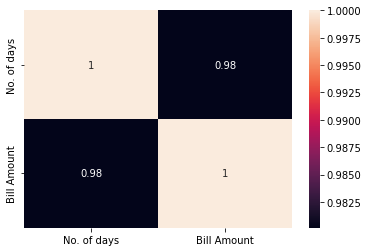

In [ ]:
## lets visualize the correlation using heatmap
sns.heatmap(data.corr(),annot=True)
plt.show()

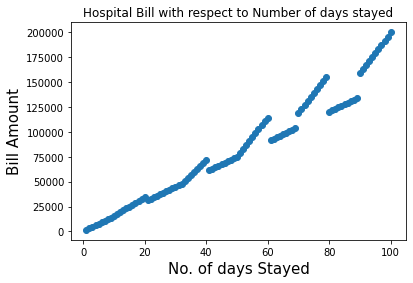

In [ ]:
plt.scatter(data['No. of days'],data['Bill Amount'])
plt.title('Hospital Bill with respect to Number of days stayed')
plt.xlabel('No. of days Stayed', fontsize=15)
plt.ylabel('Bill Amount', fontsize=15)
plt.show()

## 3. Regression Equation (without using sklearn Library)

In [ ]:
## Lets create a copy of the dataset
data_1 = data.copy()

In [ ]:
## Lets store the independent variable as x and dependent variable as y
x = data['No. of days']
y = data['Bill Amount']

### Linear equation: Y = mx + c or Y = βo + β1x 

### step1: Calculate SSxx, SSxx=Σ(x̄-x)^2

In [ ]:
x_mean = data_1['No. of days'].mean()

data_1['difference_x'] = x_mean - x

data_1['difference_x^2'] = data_1['difference_x']**2

SSxx = data_1['difference_x^2'].sum()

### step2: Calculate SSxy, SSxy=Σ(x̄-x) * ( ȳ-y)

In [ ]:
y_mean = data_1['Bill Amount'].mean()

data_1['difference_y'] = y_mean - y

SSxy = (data_1['difference_x'] * data_1['difference_y']).sum()

### step3: Calculate slope, m = SSxy/SSxx

In [ ]:
m = SSxy/SSxx
print(m)

1784.6990699069906


### step4: Calculate intercept, c = ȳ - m*x̄

In [ ]:
c = y_mean - m*x_mean
print(c)

-5648.303030303025


### Prediction function

In [ ]:
## lets write a function to predict the values of Y
def prediction(value):
    predict = m*x+c
    return predict

In [ ]:
## Lets call the 'prediction' function 
y_predicted = prediction(x)
y_predicted.sample(5)

74     81801.951395
18    138912.321632
93     92510.145815
64    103218.340234
12    158544.011401
Name: No. of days, dtype: float64

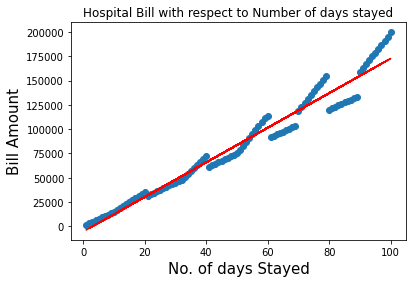

In [ ]:
## Lets visualize the predicted values
plt.scatter(data_1['No. of days'],data_1['Bill Amount'])
plt.plot(data_1['No. of days'],y_predicted,'red')
plt.title('Hospital Bill with respect to Number of days stayed')
plt.xlabel('No. of days Stayed', fontsize=15)
plt.ylabel('Bill Amount', fontsize=15)
plt.show()

### R-squared 

In [ ]:
SST = ((y-y_mean)**2).sum()
SSE = ((y-y_predicted)**2).sum()

Rsquared = (SST-SSE)/SST
print('R-squared value:',Rsquared)

R-squared value: 0.9606837532455795


## 4. Regression using Sklearn Library

In [ ]:
## Lets create a copy of the dataframe
data_2 = data.copy()

In [ ]:
x = data_2.iloc[:,:-1].values
y = data_2.iloc[:,1].values

In [ ]:
#Splitting dataset for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

In [ ]:
residue = y_pred - y_test    # residue or error between actual and predicted.
residue

array([ -5837.74264665,  -5892.92537272,  -4108.74323411,  -5229.83371596,
        -5635.10633642,  -2930.01350475,  -5687.83254105,  -4485.19623082,
        -4014.01585457, -13185.37601961,    946.43949196,   1838.53056126,
         1541.16687149,   3677.89542594,  12840.9870827 ,  -5132.64981499,
         1243.80318173,  -6577.46708892,  -4703.47061365, -11740.55874568,
        12543.62339293,  -4216.6521648 , -17238.10222424,   -540.37895689,
        18788.26087807,  -4022.28436285,  -3811.37954434,  -7335.28612522,
         8083.1680464 ,  11651.53232363,   6001.62221802,  -2172.19446846,
        -4374.83077869])

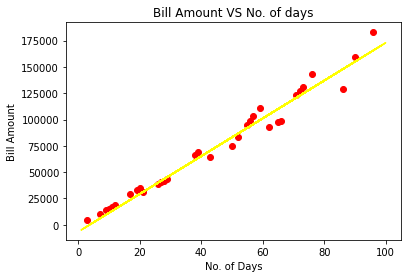

In [ ]:
plt.scatter(x_test,y_test,color="red")
plt.plot(x_train,regressor.predict(x_train),color="yellow")
plt.title("Bill Amount VS No. of days")
plt.xlabel("No. of Days")
plt.ylabel("Bill Amount")
plt.show()

In [ ]:
print(regressor.coef_)
print(regressor.intercept_)

[1797.36368977]
-6785.016442025037


In [ ]:
# r-sqr results
sklearn.metrics.r2_score(y_test, y_pred)

0.973212187171403

-----
## Happy Learning:)
-----